In [17]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats

plt.style.use('classic')
% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
post_LTD2 = pd.read_pickle('/data/ana_post_2Hz_reci')
post_LTD50 = pd.read_pickle('/data/ana_post_EI_50Hz_reci')
post_LTD50_uni = pd.read_pickle('/data/ana_post_EI_50Hz_uni')

In [3]:
post_LTD2

,Before,After,File name,elimi
121,"{'ir': [[91.1326247704], [90.7714938416], [92....","{'ir': [[76.3832880118], [74.4065433682], [72....",2017081802,30
122,"{'ir': [[61.12240872], [57.85821373], [59.5168...","{'ir': [[62.4343936092], [62.354405872], [60.9...",2017082302,50
123,"{'ir': [[60.9335545361], [59.5112290163], [61....","{'ir': [[70.3432612607], [73.1337852758], [72....",2017082304,40
124,"{'ir': [[109.783766077], [106.988444596], [106...","{'ir': [[97.5684274604], [99.3562100408], [97....",2017082402,40
125,"{'ir': [[131.537130961], [122.857754741], [120...","{'ir': [[121.35908333], [113.962296083], [107....",2017083001,45
126,"{'ir': [[95.850094088], [95.76258849], [98.585...","{'ir': [[91.2016199215], [89.217713579], [90.0...",2017083101,30


In [4]:
post_LTD50

,Before,After,File name,elimi
36,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032701,60
37,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032802,60
38,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032905,20
39,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017053102,20
172,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rs': [...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2018032301,40
175,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'rs': [[17....","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2018032802,30


In [5]:
post_LTD50_uni

,Before,After,File name,elimi
30,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'rs...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032401,70
31,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032803,50
32,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017062304,45
33,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017062701,25
34,"{'x': [1, 2, 3, 4, 5, 6, 7, 8], 'rs': [[13.324...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017060803,50


/src/Patch_ana/Patch_ana/patch_pip.py:517: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

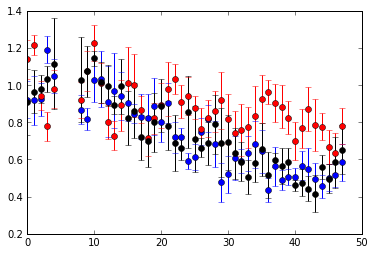

In [6]:
ave_ptl_resp = np.ones((len( post_LTD2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2, ave_ptl_2 = patch_pip.samp_ave( post_LTD2, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(post_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(post_LTD50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(post_LTD50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni, ave_ptl_50_uni = patch_pip.samp_ave(post_LTD50_uni, ave_ptl_resp)
ave_ptl_mean_50_uni = ave_ptl_mean_50_uni[:-12]
ave_ptl_ste_50_uni = ave_ptl_ste_50_uni[:-12]
ave_ptl_50_uni = ave_ptl_50_uni[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

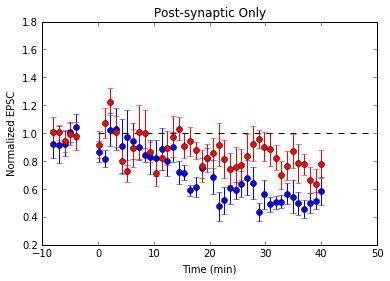

In [7]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(post_LTD2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(post_LTD50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Post-synaptic Only')

with PdfPages('/data/Figure5_3.pdf') as pdf:
    pdf.savefig()

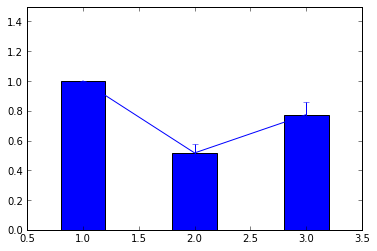

In [8]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,1.5])

with PdfPages('/data/Figure3_4.pdf') as pdf:
    pdf.savefig()

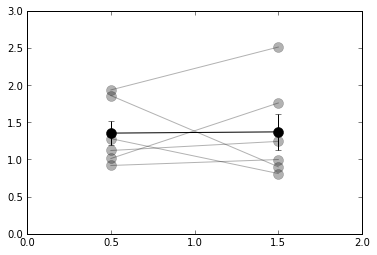

In [9]:
# Compare PPR
mean_PPR_bef = [np.nanmean(post_LTD2['Before'].loc[i]['PPR']) for i in post_LTD2['Before'].index]
mean_PPR_aft = [np.nanmean(post_LTD2['After'].loc[i]['PPR'][-10:]) for i in post_LTD2['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp3_1.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


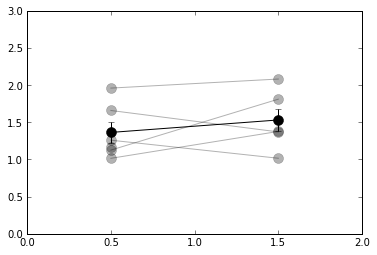

In [10]:
# Compare PPR
mean_PPR_bef = [np.nanmean(post_LTD50['Before'].loc[i]['PPR']) for i in post_LTD50['Before'].index]
mean_PPR_aft = [np.nanmean(post_LTD50['After'].loc[i]['PPR'][-10:]) for i in post_LTD50['After'].index]

mean_PPR_ave_bef = np.nanmean(mean_PPR_bef)
mean_PPR_std_bef = np.nanstd(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.nanmean(mean_PPR_aft)
mean_PPR_std_aft = np.nanstd(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp3_2.pdf') as pdf:
    pdf.savefig()

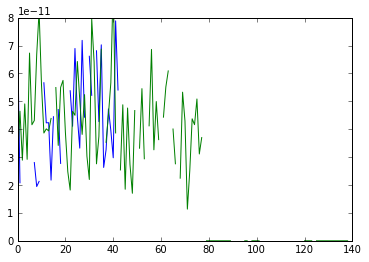

In [11]:
test_id = 38
plt.plot(post_LTD50['Before'].loc[test_id]['raw_amp1'])
plt.plot(post_LTD50['After'].loc[test_id]['raw_amp1'])

Ttest_relResult(statistic=-3.531330222442409, pvalue=0.016716070579629472)


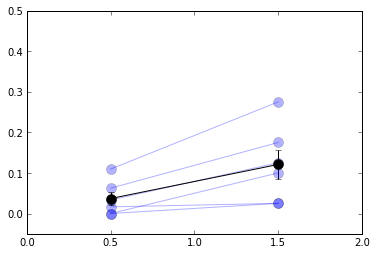

In [18]:
# Compare failure rate
mean_fail_bef = [np.sum(post_LTD2['Before'].loc[i]['failure'])/len(post_LTD2['Before'].loc[i]['failure']) for i in post_LTD2['Before'].index]
mean_fail_aft = [np.sum(post_LTD2['After'].loc[i]['failure'][-40:])/40 for i in post_LTD2['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure3_5.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-2.9347424320758018, pvalue=0.032453784035746447)


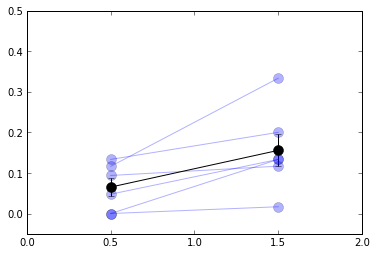

In [24]:
# Compare failure rate
mean_fail_bef = [np.sum(post_LTD50['Before'].loc[i]['failure'])/len(post_LTD50['Before'].loc[i]['failure']) for i in post_LTD50['Before'].index]
mean_fail_aft = [np.sum(post_LTD50['After'].loc[i]['failure'][-60:])/60 for i in post_LTD50['After'].index]
    print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))


mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure3_6.pdf') as pdf:
    pdf.savefig()

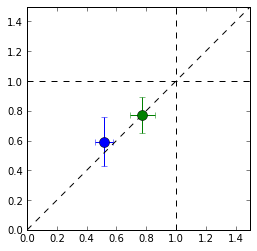

In [14]:
# CV analysis
cv_mean_bef = [np.nanmean(post_LTD2['Before'].loc[i]['raw_amp1'][-20:]) for i in post_LTD2['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(post_LTD2['Before'].loc[i]['raw_amp1'][-6:]) for i in post_LTD2['Before'].index]
end_aft = [post_LTD2['elimi'].values[i] for i in range(len(post_LTD2))]
cv_std_aft = [np.nanstd(post_LTD2['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(post_LTD2['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(post_LTD50['Before'].loc[i]['raw_amp1'][-20:]) for i in post_LTD50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(post_LTD50['Before'].loc[i]['raw_amp1'][-15:]) for i in post_LTD50['Before'].index]
end_aft = [post_LTD50['elimi'].values[i] for i in range(len(post_LTD50))]
cv_std_aft = [np.nanstd(post_LTD50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(post_LTD50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure3_7.pdf') as pdf:
    pdf.savefig()

[0, 60, 0.1, 1.7]

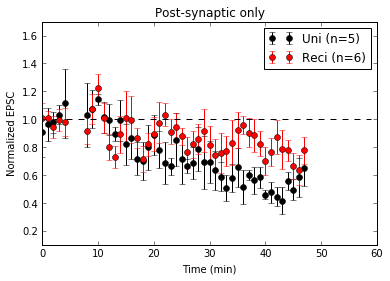

In [15]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ko', label='Uni (n={a})'.format(a=len(post_LTD50_uni)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='Reci (n={a})'.format(a=len(post_LTD50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only')
plt.axis([0,60,0.1,1.7])